# Dynamic Models for Building Energy Management

Authors: Emile HEYBERGER, Félix LABIDI, Perrine MEZIAT-BURDIN, Quentin SAMUDIO

Date: 30/05/2022

The notebooks can be run interactively on MyBinder.com by clicking on the button below:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/heyberge/Smart-Cities/HEAD)

## Report

-	Description of the building: drawing, dimensions, materials, [material properties]

Our thermal study focuses on a student flat in a residence in Grenoble. We simplify the flat as a 2-room flat: a living room of about 25 m2 and a bathroom of 6 m2.

Model plan  <img src="plan.png" width="400">


Two walls are in contact with the outside and are made of concrete and glass wool and two other walls are in contact with the corridor or a neighbouring flat (assumed to be 20°) and are made of plasterboard. <img src="surface.png" width="400">


Dimensions and features table: <img src="Caracteristiques.png" width="600">

-	Hypothesis

To simplify the octave modelling, the following assumptions are made:
‣ The temperature is uniform on each surface of a wall;
‣ Heat transfer is unidirectional in each wall ;
‣ Heat transfers with the floor and ceiling are neglected ;
‣ Heat transfers are assumed to be linear;
‣ The temperatures of the studios and the corridor surrounding the room are considered
close to that of the room. The heat flows coming from the studios and the corridor are
therefore negligible;


-	Thermal model (with justifications)

<img src="schema_maison.png" width="900">




### Elements of the thermal network

The thermal resistances for conduction are of the form:
$$R_{cd} = \frac{w}{\lambda S}$$
where:

- $w$ is the width of the material, m;
- $\lambda$ - thermal conductvity, W/m K;
- $S$ - surface area of the wall, m²

The thermals resistance for convection are of the form:
$$R_{cv} = \frac{1}{h S}$$
where:
- $h$ is the convection coefficient, W/m² K;
- $S$ - surface area of the wall, m².

The thermal capacities of the wall are of the form:
$$C_{wall}= \rho_{wall} c_{p, wall} w_{wall} S_{wall}$$

The thermal capacity of the air is:
$$C_{air} = \rho_{air} c_{air} V_{air}$$

The total shortwave incident irradiation on the wall $i$, $G_i$, may be estimated as a function of the direct solar irradiation incident on the surface of the walls, $G_{i}^{o}$:

$$S_i G_i = S_i G_{i}^{o} + \sum_{j=1}^{n} F_{j,i} S_j \rho_j G_j$$

where:
- $S_i$ is the area of the surface of the wall $i$ [m²];
- $G_i$ - total irradiation received directly and by mutiple reflections on surface $i$ [W/m²];
- $G_{i}^{o}$ - irradiance received directly from the sun on surface $i$ [W/m²];
- $F_{j, i}$ - view factor between surface $j$ and surface $i$, $0 ⩽ F_{j,i} ⩽ 1$;
- $\rho_j$ - reflectivity of surface $j$, $0 ⩽ \rho_j ⩽ 1$.




-	Mathematical model (matrices A, G, C)

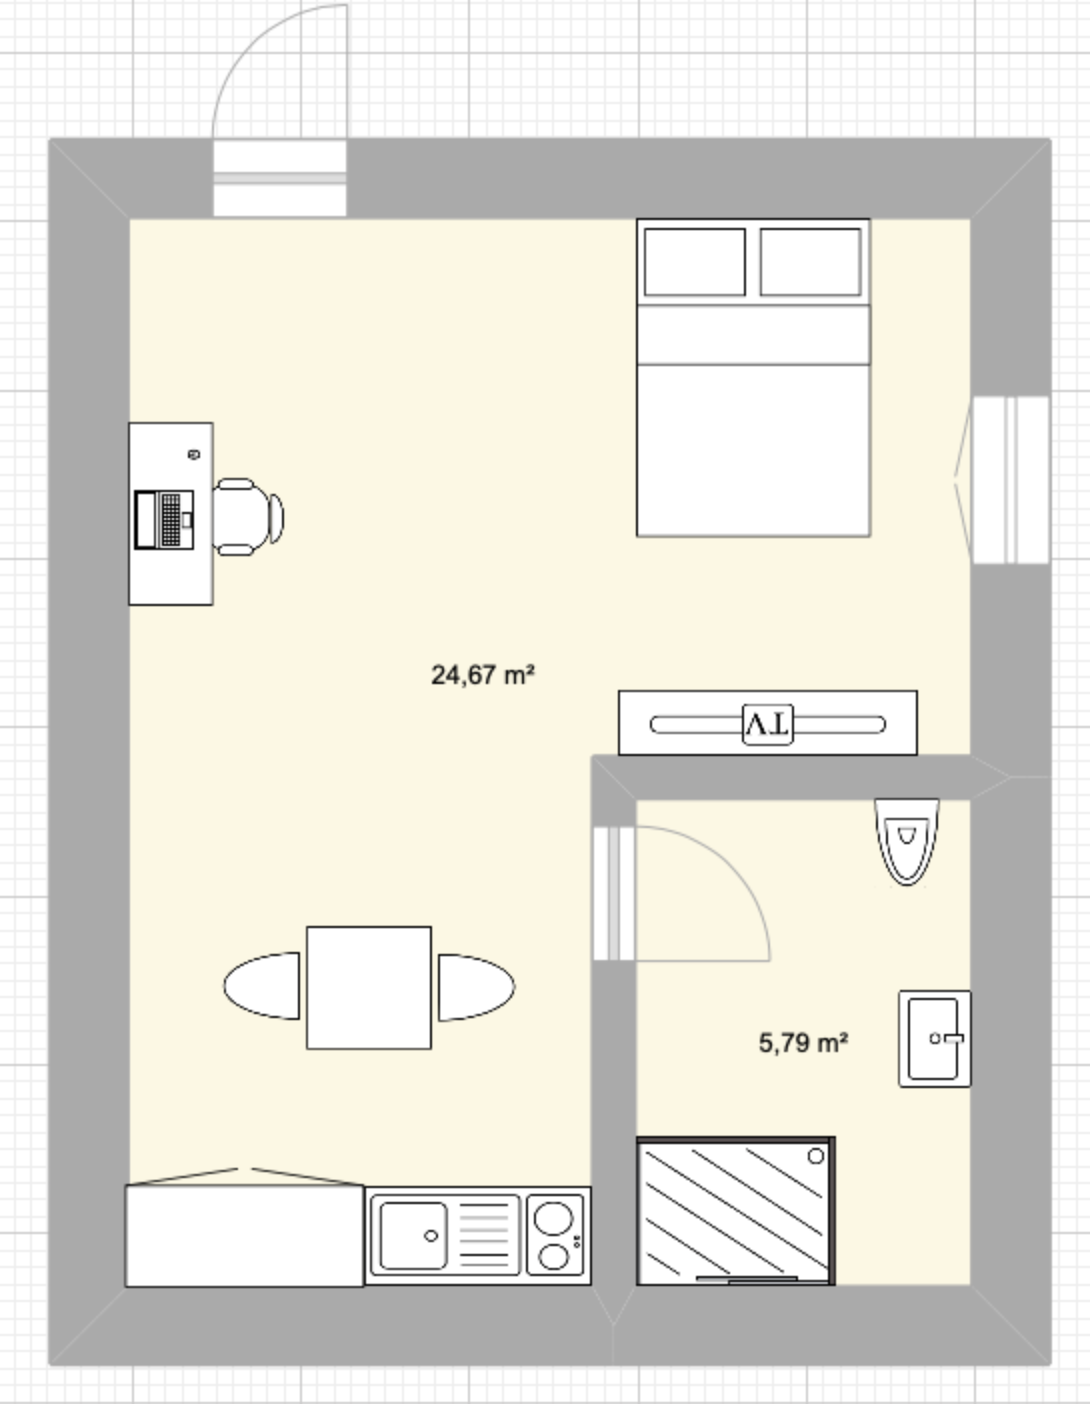

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

Text, Tcouloir=5, 20
Tcible=22

Gab,Gb,Gi ,Gia =250,275,8.75, 100
Gap,Gp,Gpa=10,2.5E+01,10
Gav,Gv,Gva=20,8.00E+02,8
Gaplaco ,Gplaco ,Gplacoa =50,4.81E+02,50
Gab2,Gb2,Gi2,Gia2=40,44,1.4,16
Gabc,Gbc,Gic,Giac=50,137.5,4.375,50





### Matrice A

In [21]:
A=np.zeros((39,32))
A[30,0],A[31,0],A[32,0],A[33,0],A[34,1],A[35,1],A[36,1],A[37,1]=1,1,1,1,1,1,1,1
A[16,0],A[27,0]=-1,-1
I=[[0,2],[1,3],[2,4],[3,5],[5,6],[6,7],[7,8],[8,9],[10,10],[11,11],[13,12],[14,13],[16,14],[17,15],[19,16],[20,17],[22,18],[23,19],[24,20],[25,21],[27,22],[28,23]]
A[4,24],A[9,25],A[15,27],A[18,28],A[21,29],A[26,30],A[29,31]=1,1,1,1,1,1,1
A[38,0]=1

i=0
for k in range(8):
    A[30+i,24+i]=-1
    i=i+1
    
for k in range(len(I)):

    A[I[k][0],I[k][1]]=1
    A[I[k][0]+1,I[k][1]]=-1
    
print("A=",np.array(A))

A= [[ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  1.  0. ...  0. -1.  0.]
 [ 0.  1.  0. ...  0.  0. -1.]
 [ 1.  0.  0. ...  0.  0.  0.]]


### MATRICE G

In [22]:


Gdiag=[Gab ,Gb ,Gb ,Gi ,Gi ,Gabc,Gbc,Gbc,Gic,Gic,Gav,Gv,Gva,Gap,Gp,Gp,Gaplaco ,Gplaco ,Gplaco ,Gav,Gv,Gv,Gab2,Gb2,Gb2,Gi2,Gi2,Gap,Gp,Gp,Gia, Giac, Gva,Gpa,Gplacoa, Gva,Gia2,Gpa, Kp]
G=np.zeros((len(Gdiag),len(Gdiag)))


for k in range(len(Gdiag)):
     G[k,k]=Gdiag[k]
     
print("G=",G) 


G= [[2.50e+02 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 2.75e+02 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 2.75e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 1.60e+01 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 1.00e+01 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 1.00e-05]]


### MATRICE b


In [23]:
b=np.zeros(39)
ind=[0,5,10,13,19,22,38]
tb=[Text,Tcouloir,Text,Tcouloir,Text,Text,Tcible]

for k in range(len(ind)):
     b[ind[k]]=tb[k]
     
print("b=",b)         


b= [ 5.  0.  0.  0.  0. 20.  0.  0.  0.  0.  5.  0.  0. 20.  0.  0.  0.  0.
  0.  5.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 22.]


### MATRICE f


In [24]:
ft=[1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1]

f=np.zeros(32)
for k in range(19):
    f[k]=ft[k]
    

print("f=",f)

f= [1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


### MATRICE C



In [25]:
c3,c5,c7,c9,c11,c13,c15,c17,c19,c21,c23=12960000,105000,3.22E+05,3.22E+05,2.00E+04,2.00E+04,1.61E+05,2073600,16800,6480000,52500

C=np.zeros((32,32))
Cval=[c3,c5,c7,c9,c11,c13,c15,c17,c19,c21,c23]
for k in range(len(Cval)):
    C[3+2*k,3+2*k]=Cval[k]

print("C=",C)


C= [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### VECTEUR u



In [26]:
y = np.ones(32)
u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])
print("u=",u)

u= [ 5. 20.  5. 20.  5.  5. 22.  1.  1.  1.  1.  1.  1.  1.  1.]




-	Model implementation in Python

-	Steady-state results

### Result for kp = 1e-5:

In [32]:
 Kp=1e-5
Gdiag=[Gab ,Gb ,Gb ,Gi ,Gi ,Gabc,Gbc,Gbc,Gic,Gic,Gav,Gv,Gva,Gap,Gp,Gp,Gaplaco ,Gplaco ,Gplaco ,Gav,Gv,Gv,Gab2,Gb2,Gb2,Gi2,Gi2,Gap,Gp,Gp,Gia, Giac, Gva,Gpa,Gplacoa, Gva,Gia2,Gpa, Kp]
G=np.zeros((len(Gdiag),len(Gdiag)))


for k in range(len(Gdiag)):
     G[k,k]=Gdiag[k]
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print('Temperatures at the different nodes obtained with the differential-algebraic equations of the thermal circuit :')
print(np.array_str(yss, precision=3, suppress_small=True))
print('\n Temperatures at the different nodes obtained with the state space:')
print(np.array_str(ytc, precision=3, suppress_small=True))
print(f'\n Max error in steady-state between thermal circuit and state-space:\{max(abs(yss - ytc)):.2e}')

Temperatures at the different nodes obtained with the differential-algebraic equations of the thermal circuit :
[10.849  9.76   5.098  5.183  5.268  7.942 19.662 19.531 19.401 15.304
  3.617  3.582 16.796 15.475 10.356 10.304  6.377  6.41   5.101  5.17
  5.239  7.404 10.46  10.304 10.615 11.208 10.849 14.153 10.253  6.443
  9.57  10.149]

 Temperatures at the different nodes obtained with the state space:
[10.849  9.76   5.098  5.183  5.268  7.942 19.662 19.531 19.401 15.304
  3.617  3.582 16.796 15.475 10.356 10.304  6.377  6.41   5.101  5.17
  5.239  7.404 10.46  10.304 10.615 11.208 10.849 14.153 10.253  6.443
  9.57  10.149]

 Max error in steady-state between thermal circuit and state-space:\1.31e-13


### Result for kp= kp = 100:

In [30]:
Kp=100
Gdiag=[Gab ,Gb ,Gb ,Gi ,Gi ,Gabc,Gbc,Gbc,Gic,Gic,Gav,Gv,Gva,Gap,Gp,Gp,Gaplaco ,Gplaco ,Gplaco ,Gav,Gv,Gv,Gab2,Gb2,Gb2,Gi2,Gi2,Gap,Gp,Gp,Gia, Giac, Gva,Gpa,Gplacoa, Gva,Gia2,Gpa, Kp]
G=np.zeros((len(Gdiag),len(Gdiag)))


for k in range(len(Gdiag)):
     G[k,k]=Gdiag[k]
        
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print('Temperatures at the different nodes obtained with the differential-algebraic equations of the thermal circuit :')
print(np.array_str(yss, precision=3, suppress_small=True))
print('\n Temperatures at the different nodes obtained with the state space:')
print(np.array_str(ytc, precision=3, suppress_small=True))
print(f'\n Max error in steady-state between thermal circuit and state-space:\{max(abs(yss - ytc)):.2e}')

Temperatures at the different nodes obtained with the differential-algebraic equations of the thermal circuit :
[20.58  17.612  5.253  5.48   5.707 12.832 20.042 20.05  20.058 20.308
  3.617  3.582 20.271 20.34  19.236 19.096  8.588  8.677  5.227  5.41
  5.593 11.35  19.52  19.096 19.957 20.558 20.58  20.409 18.956  8.765
 17.108 18.672]

 Temperatures at the different nodes obtained with the state space:
[20.58  17.612  5.253  5.48   5.707 12.832 20.042 20.05  20.058 20.308
  3.617  3.582 20.271 20.34  19.236 19.096  8.588  8.677  5.227  5.41
  5.593 11.35  19.52  19.096 19.957 20.558 20.58  20.409 18.956  8.765
 17.108 18.672]

 Max error in steady-state between thermal circuit and state-space:\9.41e-14


### Results for kp=1e6

In [33]:
Kp=1e6
Gdiag=[Gab ,Gb ,Gb ,Gi ,Gi ,Gabc,Gbc,Gbc,Gic,Gic,Gav,Gv,Gva,Gap,Gp,Gp,Gaplaco ,Gplaco ,Gplaco ,Gav,Gv,Gv,Gab2,Gb2,Gb2,Gi2,Gi2,Gap,Gp,Gp,Gia, Giac, Gva,Gpa,Gplacoa, Gva,Gia2,Gpa, Kp]
G=np.zeros((len(Gdiag),len(Gdiag)))


for k in range(len(Gdiag)):
     G[k,k]=Gdiag[k]
        
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print('Temperatures at the different nodes obtained with the differential-algebraic equations of the thermal circuit :')
print(np.array_str(yss, precision=3, suppress_small=True))
print('\n Temperatures at the different nodes obtained with the state space:')
print(np.array_str(ytc, precision=3, suppress_small=True))
print(f'\n Max error in steady-state between thermal circuit and state-space:\{max(abs(yss - ytc)):.2e}')

Temperatures at the different nodes obtained with the differential-algebraic equations of the thermal circuit :
[22.    18.757  5.276  5.523  5.771 13.545 20.097 20.126 20.154 21.038
  3.617  3.582 20.779 21.05  20.531 20.378  8.911  9.008  5.245  5.445
  5.645 11.926 20.842 20.378 21.32  21.922 22.    21.321 20.226  9.104
 18.207 19.915]

 Temperatures at the different nodes obtained with the state space:
[22.    18.757  5.276  5.523  5.771 13.545 20.097 20.126 20.154 21.038
  3.617  3.582 20.779 21.05  20.531 20.378  8.911  9.008  5.245  5.445
  5.645 11.926 20.842 20.378 21.32  21.922 22.    21.321 20.226  9.104
 18.207 19.915]

 Max error in steady-state between thermal circuit and state-space:\8.17e-14


1e6 is the limit for which the temperature at node 0 reaches the target temperature. 

### Results for kp=1e4:

In [34]:
Kp=1e4
Gdiag=[Gab ,Gb ,Gb ,Gi ,Gi ,Gabc,Gbc,Gbc,Gic,Gic,Gav,Gv,Gva,Gap,Gp,Gp,Gaplaco ,Gplaco ,Gplaco ,Gav,Gv,Gv,Gab2,Gb2,Gb2,Gi2,Gi2,Gap,Gp,Gp,Gia, Giac, Gva,Gpa,Gplacoa, Gva,Gia2,Gpa, Kp]
G=np.zeros((len(Gdiag),len(Gdiag)))


for k in range(len(Gdiag)):
     G[k,k]=Gdiag[k]
        
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print('Temperatures at the different nodes obtained with the differential-algebraic equations of the thermal circuit :')
print(np.array_str(yss, precision=3, suppress_small=True))
print('\n Temperatures at the different nodes obtained with the state space:')
print(np.array_str(ytc, precision=3, suppress_small=True))
print(f'\n Max error in steady-state between thermal circuit and state-space:\{max(abs(yss - ytc)):.2e}')

Temperatures at the different nodes obtained with the differential-algebraic equations of the thermal circuit :
[21.984 18.744  5.276  5.523  5.77  13.537 20.097 20.125 20.153 21.03
  3.617  3.582 20.773 21.042 20.516 20.364  8.907  9.004  5.245  5.444
  5.644 11.919 20.827 20.364 21.304 21.907 21.984 21.311 20.211  9.1
 18.195 19.901]

 Temperatures at the different nodes obtained with the state space:
[21.984 18.744  5.276  5.523  5.77  13.537 20.097 20.125 20.153 21.03
  3.617  3.582 20.773 21.042 20.516 20.364  8.907  9.004  5.245  5.444
  5.644 11.919 20.827 20.364 21.304 21.907 21.984 21.311 20.211  9.1
 18.195 19.901]

 Max error in steady-state between thermal circuit and state-space:\9.41e-14


This value of Kp is therefore retained for the following. Indeed, the difference at the target temperature remains minimal (we reach 21.984°C, which is satisfactory), and we limit the value of the gain.
 At node 1 (bathroom), the temperature reached is 18.7°C


We also note the very small difference between the two models in all the different cases.


-	Dynamic simulation results

Evolution of the temperature at node 0 (main room)

<img src="dynamic.png" width="500">

We arrive at the target temperature of 22°C (with the same deviation as observed earlier, due to the limitation of the value of Kp to 1e4)
There is very little difference between the solution with implicit Euler and the one with explicit Euler (the two curves are almost superimposed). 

Temperature evolution at node 1 (bathroom): stabilises at 18.3°C. 

<img src="dynamic_N1.png" width="500">